# Python Imports

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import networkx as nx
import random
import csv
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches

In [ ]:
def DownloadDataFrame(df, filename):
  df.to_csv(filename, encoding = 'utf-8-sig', index=False, quoting=csv.QUOTE_NONNUMERIC)
  files.download(filename)

# Load Comments

In [ ]:
comments_url = "https://drive.usercontent.google.com/download?id=18vF-9KzvBH1NDnepzVpEKEsHqJnSrZu-&export=download&authuser=3&confirm=t&uuid=16516fb9-e9fa-4f21-9e52-a771b33787c3&at=APZUnTULRxOxdxsScK9nILnflb3q:1694052463506"
# read csv file
colab_comments = pd.read_csv(comments_url, sep=',', decimal='.', header=0)
print(colab_comments.shape)
print(colab_comments.head(1))
colab_comments

(334682, 6)
     id                created_at  colab_user_id_from  colab_user_id_to  \
0  7175  2014-05-04T00:14:40-0300               32595             28560   

   event_type_id  event_id  
0           1181      6252  


,id,created_at,colab_user_id_from,colab_user_id_to,event_type_id,event_id
0,7175,2014-05-04T00:14:40-0300,32595,28560,1181,6252
1,11259,2014-07-24T13:45:28-0300,40434,40434,3949,8509
2,12165,2014-08-08T12:06:55-0300,41132,40544,60,8464
3,10590,2014-07-09T17:59:25-0300,36998,36998,3920,8039
4,7443,2014-05-07T21:49:46-0300,32968,32065,3940,6370
...,...,...,...,...,...,...
334677,33749,2015-03-08T21:56:35-0300,75404,63081,1190,18222
334678,119668,2016-03-10T19:05:41-0300,114778,114778,4973,50642
334679,25352,2015-01-11T20:06:05-0200,63405,62718,1214,14446
334680,25354,2015-01-11T20:12:23-0200,63405,62535,1214,14389


# Load Likes

In [ ]:
likes_url = "https://drive.usercontent.google.com/download?id=1jBjbR_jZQZNsMdpk9e5UuOlfSoMGPIsm&export=download&authuser=3&confirm=t&uuid=16516fb9-e9fa-4f21-9e52-a771b33787c3&at=APZUnTULRxOxdxsScK9nILnflb3q:1694052463506"
# read csv file
colab_likes = pd.read_csv(likes_url, sep=',', decimal='.', header=0)
print(colab_likes.shape)
print(colab_likes.head(1))
colab_likes

(1048575, 6)
      id                created_at  colab_user_id_from  colab_user_id_to  \
0  21262  2014-05-11T01:39:04-0300               29163             27334   

   event_type_id  event_id  
0           1214      6456  


,id,created_at,colab_user_id_from,colab_user_id_to,event_type_id,event_id
0,21262,2014-05-11T01:39:04-0300,29163,27334,1214,6456
1,20696,2014-05-08T11:41:22-0300,32994,14375,3920,6394
2,20814,2014-05-08T23:51:51-0300,32092,32092,7575,6401
3,21258,2014-05-11T01:22:15-0300,33018,33018,1363,6428
4,21277,2014-05-11T04:01:42-0300,32977,3699,7586,6463
...,...,...,...,...,...,...
1048570,1223098,2021-11-24T21:59:42-0300,186310,186310,9954,329797
1048571,1302647,2022-02-08T15:04:38-0300,186310,231120,9908,173883
1048572,1307278,2022-02-11T17:07:36-0300,415276,268969,9926,349198
1048573,1307563,2022-02-11T17:28:34-0300,415276,264351,432,336844


# Load Up/Down Votes

In [ ]:
updown_url = "https://drive.usercontent.google.com/download?id=1eM6AwfPYlmfrqQOuop9Im46AedYe_E93&export=download&authuser=3&confirm=t&uuid=eed60c3f-bce1-46cd-83eb-a9c33bd55df9&at=APZUnTVojRNJK9ALj7DRZ_D5is--:1694050615548"
colab_updown = pd.read_csv(updown_url)
print(colab_updown.shape)
print(colab_updown.head(1))
colab_updown

(58685, 9)
   id                created_at  colab_user_id_from  colab_user_id_to  \
0  28  2021-08-04T21:02:21-0300              236585               NaN   

   event_id  event_type_id  colab_user_event  comment_id vote  
0  300071.0         1689.0           76184.0      849707   UP  


,id,created_at,colab_user_id_from,colab_user_id_to,event_id,event_type_id,colab_user_event,comment_id,vote
0,28,2021-08-04T21:02:21-0300,236585,NaN,300071.0,1689.0,76184.0,849707,UP
1,35,2021-08-05T00:43:11-0300,323968,313537.0,217188.0,3353.0,313537.0,591072,UP
2,50,2021-08-05T00:44:51-0300,323968,429282.0,217188.0,3353.0,313537.0,836739,UP
3,76,2021-08-05T16:55:47-0300,202266,NaN,153045.0,7578.0,202266.0,416256,UP
4,89,2021-08-05T21:27:10-0300,222051,222051.0,164113.0,3332.0,222051.0,838576,UP
...,...,...,...,...,...,...,...,...,...
58680,35344,2022-06-02T01:23:08-0300,227897,NaN,378589.0,3327.0,227897.0,1074711,UP
58681,35347,2022-06-02T02:32:44-0300,116186,262480.0,NaN,NaN,NaN,1027219,DOWN
58682,35350,2022-06-02T03:03:05-0300,688906,689179.0,376664.0,11652.0,689179.0,1068924,UP
58683,35351,2022-06-02T03:20:54-0300,688906,NaN,377119.0,11652.0,684855.0,1070466,UP


# Load Interactions

In [ ]:
colab_interactions_url = "https://drive.usercontent.google.com/download?id=1dzl0zHc2epFR3GW8Nq-K7GDTSG7cfm2k&export=download&authuser=1&confirm=t&uuid=bc743b28-ff56-42bf-a96c-d4267cc11937&at=APZUnTVKFx_VGDADhevdZjHrfLod%3A1705378063909"
colab_interactions = pd.read_csv(colab_interactions_url)
# Extrair o ano da coluna 'created_at_interaction'
colab_interactions['year'] = colab_interactions['created_at_interaction'].str.extract(r'(\d{4})')

In [ ]:
print(colab_interactions.shape)
print(colab_interactions.head(1))
colab_interactions

(801792, 19)
           type  colab_user_id_FROM    created_at_interaction  \
0  Up/down_vote              323968  2021-08-05T00:43:11-0300   

   colab_user_id_TO birth_date_FROM  city_id_FROM education_FROM gender_FROM  \
0            313537      1969-08-11          5317       bachelor      female   

  race_FROM Município_FROM  idade_FROM birth_date_TO  city_id_TO education_TO  \
0     white    Santo André        54.0    1992-01-31      5317.0     bachelor   

  gender_TO race_TO Município_TO  idade_TO  year  
0      male     NaN  Santo André      31.0  2021  


,type,colab_user_id_FROM,created_at_interaction,colab_user_id_TO,birth_date_FROM,city_id_FROM,education_FROM,gender_FROM,race_FROM,Município_FROM,idade_FROM,birth_date_TO,city_id_TO,education_TO,gender_TO,race_TO,Município_TO,idade_TO,year
0,Up/down_vote,323968,2021-08-05T00:43:11-0300,313537,1969-08-11,5317,bachelor,female,white,Santo André,54.0,1992-01-31,5317.0,bachelor,male,NaN,Santo André,31.0,2021
1,Up/down_vote,323968,2021-08-05T00:44:51-0300,429282,1969-08-11,5317,bachelor,female,white,Santo André,54.0,1971-08-24,5317.0,bachelor,male,NaN,Santo André,52.0,2021
2,Up/down_vote,222051,2021-08-05T21:27:10-0300,222051,1961-02-12,5317,primary,male,NaN,Santo André,62.0,1961-02-12,5317.0,primary,male,NaN,Santo André,62.0,2021
3,Up/down_vote,440321,2021-08-06T17:21:07-0300,405722,1995-12-16,3638,secondary,female,brown,Niterói,28.0,1982-07-16,3638.0,bachelor,male,white,Niterói,41.0,2021
4,Up/down_vote,355872,2021-08-06T17:47:56-0300,405722,1996-05-02,3638,unfinished_bachelor,female,white,Niterói,27.0,1982-07-16,3638.0,bachelor,male,white,Niterói,41.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801787,Comment,691875,2023-04-18T17:24:30-0300,691875,1959-03-07,3638,NaN,male,NaN,Niterói,64.0,1959-03-07,3638.0,NaN,male,NaN,Niterói,64.0,2023
801788,Comment,940432,2023-04-18T17:46:30-0300,940432,NaN,3638,unfinished_bachelor,male,NaN,Niterói,NaN,NaN,3638.0,unfinished_bachelor,male,NaN,Niterói,NaN,2023
801789,Comment,940432,2023-04-18T17:47:58-0300,940432,NaN,3638,unfinished_bachelor,male,NaN,Niterói,NaN,NaN,3638.0,unfinished_bachelor,male,NaN,Niterói,NaN,2023
801790,Comment,940432,2023-04-18T17:49:05-0300,940432,NaN,3638,unfinished_bachelor,male,NaN,Niterói,NaN,NaN,3638.0,unfinished_bachelor,male,NaN,Niterói,NaN,2023


# Creating a new dataframe with the user's info

In [ ]:
# Create a set of unique user IDs from 'colab_user_id_FROM' column
unique_user_ids_from = set(colab_interactions['colab_user_id_FROM'].unique())

# Create a set of unique user IDs from 'colab_user_id_TO' column
unique_user_ids_to = set(colab_interactions['colab_user_id_TO'].unique())

# Merge the two sets to get all unique user IDs
all_unique_user_ids = unique_user_ids_from.union(unique_user_ids_to)

print("Unique User IDs from both 'colab_user_id_FROM' and 'colab_user_id_TO' columns:")
print(all_unique_user_ids)
print(len(all_unique_user_ids))
# Convert the merged set into a sorted list
sorted_unique_user_ids = sorted(all_unique_user_ids)
print(sorted_unique_user_ids)

Unique User IDs from both 'colab_user_id_FROM' and 'colab_user_id_TO' columns:
{1, 2, 262147, 3, 5, 262150, 6, 262152, 12, 14, 18, 21, 24, 28, 262173, 30, 31, 262176, 262177, 262178, 32, 34, 38, 39, 41, 262189, 45, 46, 48, 262201, 262202, 60, 62, 262208, 68, 69, 70, 262215, 71, 73, 72, 262219, 76, 78, 262226, 86, 262231, 262235, 98, 106, 107, 108, 111, 116, 122, 262269, 129, 130, 135, 137, 139, 140, 144, 262289, 146, 145, 148, 151, 262301, 262302, 159, 161, 162, 164, 166, 172, 181, 188, 200, 262350, 207, 215, 229, 245, 262391, 262392, 247, 274, 262425, 286, 262431, 262435, 262437, 294, 293, 296, 262447, 262448, 315, 262460, 262468, 262472, 262475, 262480, 339, 262485, 262496, 262503, 262512, 262513, 369, 368, 373, 262523, 382, 262536, 392, 262538, 394, 402, 262552, 424, 428, 429, 262576, 436, 438, 446, 451, 459, 467, 482, 262629, 262642, 498, 262645, 503, 262651, 509, 262656, 262667, 526, 530, 531, 534, 544, 546, 262694, 262705, 564, 566, 567, 262715, 572, 574, 262720, 590, 262736, 599

In [ ]:
# Split the dataframe into "FROM" and "TO" dataframes
df_from = colab_interactions[['colab_user_id_FROM', 'birth_date_FROM', 'Município_FROM', 'education_FROM', 'gender_FROM', 'idade_FROM', 'race_FROM']]
df_to = colab_interactions[['colab_user_id_TO', 'birth_date_TO', 'Município_TO', 'education_TO', 'gender_TO', 'idade_TO', 'race_TO']]

# Rename columns
df_from.columns = ['colab_user_id', 'birth_date', 'city', 'education', 'gender', 'idade', 'race']
df_to.columns = ['colab_user_id', 'birth_date', 'city', 'education', 'gender', 'idade', 'race']

# Concatenate and drop duplicates
user_info_df = pd.concat([df_from, df_to], ignore_index=True).drop_duplicates(subset='colab_user_id')

user_info_df

,colab_user_id,birth_date,city,education,gender,idade,race
0,323968,1969-08-11,Santo André,bachelor,female,54.0,white
2,222051,1961-02-12,Santo André,primary,male,62.0,NaN
3,440321,1995-12-16,Niterói,secondary,female,28.0,brown
4,355872,1996-05-02,Niterói,unfinished_bachelor,female,27.0,white
5,427856,1960-05-04,Niterói,bachelor,male,63.0,white
...,...,...,...,...,...,...,...
1591874,702775,1980-07-16,São Gonçalo,NaN,male,43.0,NaN
1594548,362855,1983-01-07,Santo André,NaN,male,40.0,NaN
1597243,947835,NaN,Serra,NaN,male,NaN,NaN
1599531,694585,1974-10-20,São Gonçalo,secondary,male,49.0,brown


# Comparando com os eventos originais

In [ ]:
#colab_events_url = "https://drive.google.com/uc?id=1Q-wSaTZGdP7xzsYFGV5E58feEN3e49yL&export=download"
colab_events_url = "https://drive.google.com/uc?id=1ve5bdHhtE0Kl4Pci8A6l6XIikkbl1Bwm&export=download"
colab_events = pd.read_csv(colab_events_url, on_bad_lines='skip')
colab_events = colab_events.rename(columns={'user_id': 'colab_user_id', 'id': 'event_id', 'lng': 'lon'})
colab_events = pd.merge(colab_events, user_info_df[['colab_user_id', 'city']], on='colab_user_id', how='left')

In [ ]:
colab_events['created_at'] = pd.to_datetime(colab_events['created_at'])

# Encontrar a data de início e final
start_date = colab_events['created_at'].min()
end_date = colab_events['created_at'].max()

print("Data de início:", start_date)
print("Data final:", end_date)

Data de início: 2013-03-06 18:59:00
Data final: 2022-05-23 18:06:00


In [ ]:
print(colab_events.shape)
print(colab_events.head(1))
colab_events

(329694, 10)
   event_id  colab_user_id                                        description  \
0         5            623  Carro estacionado na calçada em Edelson Cabele...   

     status          created_at  event_type_id  \
0  RECUSADO 2013-03-06 18:59:00           7575   

                            event_type_name       lat        lon    city  
0  Ponto de infração de trânsito recorrente -8.046207 -34.895451  Recife  


,event_id,colab_user_id,description,status,created_at,event_type_id,event_type_name,lat,lon,city
0,5,623,Carro estacionado na calçada em Edelson Cabele...,RECUSADO,2013-03-06 18:59:00,7575,Ponto de infração de trânsito recorrente,-8.046207,-34.895451,Recife
1,8,68,Estacionamento da própria Prefeitura próximo a...,RECUSADO,2013-03-07 19:03:00,7575,Ponto de infração de trânsito recorrente,-8.126271,-34.903793,Recife
2,9,166,"Na esquina com a rua da Aurora, calçada da Com...",RECUSADO,2013-03-07 21:56:00,7546,Calçada irregular,-8.047074,-34.877379,Recife
3,10,164,Todos os dias a concessionária Auto Mar estaci...,RECUSADO,2013-03-08 00:51:00,7575,Ponto de infração de trânsito recorrente,-8.097561,-34.885641,Recife
4,11,733,"Diariamente, até mesmo em frente a prédio da p...",RECUSADO,2013-03-08 02:10:00,7575,Ponto de infração de trânsito recorrente,-8.043143,-34.891382,Recife
...,...,...,...,...,...,...,...,...,...,...
329689,377001,179101,"Esgoto escorrendo da caixa pluvial, situação c...",ABERTO,2022-05-23 17:54:00,1742,Vazamento de esgoto,-22.930053,-43.022251,Niterói
329690,377002,664235,"Olá, prezados, solicito por favor a fixação de...",NOVO,2022-05-23 18:02:00,11064,Manutenção Predial Geral,-20.501867,-54.613311,NaN
329691,377003,681506,Limpeza em toda extensão da Rua José Bonifáci...,NOVO,2022-05-23 18:05:00,9955,Descarte irregular de lixo,-22.783890,-43.410561,Mesquita
329692,377004,404396,árvores na rua caindo sobre as casas Ponto ...,NOVO,2022-05-23 18:05:00,1699,Poda de árvore,-22.891748,-43.066333,Niterói


In [ ]:
# Extract the 'user_id' column from colab_events
users_in_colab_events = colab_events['colab_user_id'].unique()

users_without_events = [user_id for user_id in sorted_unique_user_ids if user_id not in users_in_colab_events]

print("Users without rows in colab_events:")
print(users_without_events)
print(len(users_without_events))
print(len(all_unique_user_ids))

Users without rows in colab_events:
[5, 6, 14, 30, 34, 41, 46, 48, 60, 62, 69, 76, 98, 116, 122, 129, 135, 139, 144, 145, 146, 148, 181, 188, 200, 207, 229, 245, 274, 286, 293, 296, 315, 339, 382, 392, 424, 429, 438, 467, 498, 526, 544, 566, 572, 590, 600, 602, 608, 610, 635, 655, 673, 675, 696, 699, 720, 726, 749, 783, 792, 806, 816, 845, 851, 855, 944, 947, 973, 977, 987, 999, 1011, 1030, 1055, 1057, 1066, 1071, 1087, 1089, 1097, 1100, 1107, 1127, 1133, 1153, 1161, 1267, 1298, 1315, 1347, 1364, 1387, 1391, 1409, 1418, 1442, 1449, 1466, 1475, 1489, 1496, 1497, 1511, 1525, 1549, 1553, 1567, 1577, 1589, 1615, 1649, 1696, 1697, 1716, 1720, 1732, 1743, 1744, 1761, 1776, 1778, 1779, 1794, 1796, 1801, 1833, 1838, 1862, 1878, 1888, 1890, 1893, 1901, 1909, 1924, 1928, 1940, 1944, 1947, 1956, 1982, 1991, 2020, 2033, 2095, 2098, 2135, 2166, 2169, 2183, 2184, 2190, 2197, 2235, 2259, 2274, 2302, 2315, 2323, 2371, 2396, 2400, 2406, 2408, 2437, 2495, 2516, 2519, 2531, 2539, 2556, 2585, 2594, 2608, 

In [ ]:
colab_events_missing_users_url = "https://drive.google.com/uc?id=1oc1NU9S0Lt57rmWxRQrsJ5PSurbqtTDj&export=download"
colab_events_missing_users = pd.read_csv(colab_events_missing_users_url)
colab_events_missing_users = colab_events_missing_users.drop(columns=['deleted_at', 'city_id'])
print(colab_events_missing_users.shape)
print(colab_events_missing_users.head(1))
colab_events_missing_users

(32921, 10)
   event_id  colab_user_id                                        description  \
0    398893         689995  cratera se formando junto ao meio fio da calça...   

        status                created_at  event_type_id  event_type_name  \
0  ATENDIMENTO  2022-08-22T12:32:45-0300           9761  Buraco nas vias   

     city       lat        lon  
0  Maceió -9.674018 -35.761009  


,event_id,colab_user_id,description,status,created_at,event_type_id,event_type_name,city,lat,lon
0,398893,689995,cratera se formando junto ao meio fio da calça...,ATENDIMENTO,2022-08-22T12:32:45-0300,9761,Buraco nas vias,Maceió,-9.674018,-35.761009
1,445735,505906,poste com lâmpada queimada a varios meses.\n\n...,RECUSADO,2023-02-24T21:13:04-0300,11421,Lâmpada apagada à noite,São Gonçalo,-22.850234,-43.068530
2,442170,431354,"Poste sem iluminação pública, desde a semana d...",FECHADO,2023-02-15T21:59:35-0300,1689,Lâmpada apagada à noite,Niterói,-22.892010,-43.091803
3,420493,690592,venho por meio desta solicitação um pedido de...,FECHADO,2022-12-01T00:16:37-0300,9955,Descarte irregular de lixo,Mesquita,-22.797534,-43.441498
4,406621,717058,Solicito me humilhando mais uma vez que troque...,FECHADO,2022-09-27T21:37:47-0300,11421,Lâmpada apagada à noite,São Gonçalo,-22.840175,-43.065324
...,...,...,...,...,...,...,...,...,...,...
32916,318142,133757,Lampada apagada a noite,FECHADO,2021-10-06T21:06:33-0300,5645,Lâmpada apagada à noite,Novo Hamburgo,-29.722039,-51.143741
32917,334283,91232,Todos os dias há o mesmo problema. Motoristas ...,FECHADO,2021-12-15T01:28:35-0300,5585,Ponto de infração de trânsito recorrente,Novo Hamburgo,-29.718532,-51.128758
32918,435094,723243,"Um poste com ""4 pétalas"" lâmpadas LEDs em curt...",FECHADO,2023-01-29T07:46:32-0300,11680,Lâmpada apagada à noite,Diadema,-23.679597,-46.596144
32919,453375,203800,Fio e cabo de aço pendurados. Perigo para pede...,FECHADO,2023-03-14T19:42:10-0300,1687,Fiação irregular,Niterói,-22.898819,-43.094667


In [ ]:
# Concatenate the two DataFrames
all_events = pd.concat([colab_events, colab_events_missing_users], ignore_index=True)

# Filter the DataFrame to only include rows with user_ids in sorted_unique_user_ids
filtered_events = all_events[all_events['colab_user_id'].isin(sorted_unique_user_ids)]

print(filtered_events.shape)
print(filtered_events.head(1))
filtered_events

(300861, 10)
   event_id  colab_user_id                                        description  \
0         5            623  Carro estacionado na calçada em Edelson Cabele...   

     status           created_at  event_type_id  \
0  RECUSADO  2013-03-06 18:59:00           7575   

                            event_type_name       lat        lon    city  
0  Ponto de infração de trânsito recorrente -8.046207 -34.895451  Recife  


,event_id,colab_user_id,description,status,created_at,event_type_id,event_type_name,lat,lon,city
0,5,623,Carro estacionado na calçada em Edelson Cabele...,RECUSADO,2013-03-06 18:59:00,7575,Ponto de infração de trânsito recorrente,-8.046207,-34.895451,Recife
1,8,68,Estacionamento da própria Prefeitura próximo a...,RECUSADO,2013-03-07 19:03:00,7575,Ponto de infração de trânsito recorrente,-8.126271,-34.903793,Recife
2,9,166,"Na esquina com a rua da Aurora, calçada da Com...",RECUSADO,2013-03-07 21:56:00,7546,Calçada irregular,-8.047074,-34.877379,Recife
3,10,164,Todos os dias a concessionária Auto Mar estaci...,RECUSADO,2013-03-08 00:51:00,7575,Ponto de infração de trânsito recorrente,-8.097561,-34.885641,Recife
4,11,733,"Diariamente, até mesmo em frente a prédio da p...",RECUSADO,2013-03-08 02:10:00,7575,Ponto de infração de trânsito recorrente,-8.043143,-34.891382,Recife
...,...,...,...,...,...,...,...,...,...,...
362610,318142,133757,Lampada apagada a noite,FECHADO,2021-10-06T21:06:33-0300,5645,Lâmpada apagada à noite,-29.722039,-51.143741,Novo Hamburgo
362611,334283,91232,Todos os dias há o mesmo problema. Motoristas ...,FECHADO,2021-12-15T01:28:35-0300,5585,Ponto de infração de trânsito recorrente,-29.718532,-51.128758,Novo Hamburgo
362612,435094,723243,"Um poste com ""4 pétalas"" lâmpadas LEDs em curt...",FECHADO,2023-01-29T07:46:32-0300,11680,Lâmpada apagada à noite,-23.679597,-46.596144,Diadema
362613,453375,203800,Fio e cabo de aço pendurados. Perigo para pede...,FECHADO,2023-03-14T19:42:10-0300,1687,Fiação irregular,-22.898819,-43.094667,Niterói


In [ ]:
# Extract the 'user_id' column from colab_events
users_in_colab_events = filtered_events['colab_user_id'].unique()

users_without_events = [user_id for user_id in sorted_unique_user_ids if user_id not in users_in_colab_events]

print("Users without rows in colab_events:")
#print(users_without_events)
print(len(users_without_events))
#print(len(all_unique_user_ids))
all_ids_present = filtered_events['colab_user_id'].isin(sorted_unique_user_ids).all()

print(all_ids_present)

Users without rows in colab_events:
19292
True


# New Section

In [ ]:
#unique_types = colab_interactions['type'].unique()
#print(unique_types)
##
# Filter the DataFrame for rows where type is "Connection"
connections = colab_interactions[colab_interactions['type'] == 'Connection']

# Create the edgelist DataFrame
edgelist = connections[['colab_user_id_FROM', 'colab_user_id_TO', 'created_at_interaction']]
edgelist.columns = ['source', 'target', 'created_at']

print(edgelist)


        source  target                created_at
581176       2    2767  2014-08-13T00:00:00-0300
581177   20666   64273  2015-02-05T00:00:00-0200
581178   20666   43600  2015-02-05T00:00:00-0200
581179   65771   22120  2015-02-05T00:00:00-0200
581180   65771   11488  2015-02-05T00:00:00-0200
...        ...     ...                       ...
621390  215293  249557  2019-09-18T00:00:00-0300
621391  221535  237294  2019-09-18T00:00:00-0300
621392  246568  250436  2019-09-19T00:00:00-0300
621393  258633  188780  2019-11-09T00:00:00-0300
621394  264486  219108  2020-01-03T00:00:00-0300

[40219 rows x 3 columns]


In [ ]:
# Check if all sources are in user_info_df
all_sources_present = edgelist['source'].isin(user_info_df['colab_user_id']).all()

# Check if all targets are in user_info_df
all_targets_present = edgelist['target'].isin(user_info_df['colab_user_id']).all()

# Check if both sources and targets are present
all_users_present = all_sources_present and all_targets_present

print("All sources in user_info_df:", all_sources_present)
print("All targets in user_info_df:", all_targets_present)
print("All users in edgelist are in user_info_df:", all_users_present)


All sources in user_info_df: True
All targets in user_info_df: True
All users in edgelist are in user_info_df: True


In [ ]:
DownloadDataFrame(edgelist, "edges.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Get unique user_ids from both 'source' and 'target' columns in edgelist
users_in_edgelist = pd.concat([edgelist['source'], edgelist['target']]).unique()

# Filter user_info_df to only include rows with user_ids in users_in_edgelist
filtered_user_info = user_info_df[user_info_df['colab_user_id'].isin(users_in_edgelist)]

print(len(filtered_user_info))
print(len(user_info_df))
#DownloadDataFrame(filtered_user_info, "nodes.csv")

18891
57801


# Frequência de Interações

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Category10
from bokeh.models import ColumnDataSource, HoverTool
import pandas as pd
# Criar um DataFrame separado para cada tipo de interação
types = colab_interactions['type'].unique()
dfs = []
colors = Category10[len(types)]
for i, interaction_type in enumerate(types):
    df = colab_interactions[colab_interactions['type'] == interaction_type]
    df_counts = df['year'].value_counts().sort_index()
    dfs.append(df_counts)

# Criar um objeto Figure do Bokeh
p = figure(title='Frequência de Interações ao Longo dos Anos por Tipo', x_axis_label='Ano', y_axis_label='Frequência de Interações')
p.sizing_mode = 'stretch_width'


# Plotar as linhas de frequência de interações para cada tipo
for i, df_counts in enumerate(dfs):
    source = ColumnDataSource(data=dict(year=df_counts.index, frequency=df_counts.values))
    p.line(x='year', y='frequency', source=source, line_color=colors[i], legend_label=types[i])

# Adicionar interatividade com o HoverTool
hover = HoverTool(tooltips=[('Tipo', '@type'), ('Ano', '@year'), ('Frequência', '@frequency')])
p.add_tools(hover)

# Exibir o gráfico interativo no notebook
output_notebook()
show(p)


#

In [ ]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Criar uma cópia do DataFrame colab_interactions
df_copy = colab_interactions.copy()

# Definir os novos limites das categorias
limits = [0, 1, 2, 5, 10, 100, np.inf]

# Definir os novos rótulos das categorias
labels = ['<1', '1-2', '2-5', '5-10', '>10', '>100']

# Contagem de conexões por usuário
connection_counts = df_copy[df_copy['type'] == 'Connection']['colab_user_id_TO'].value_counts()

# Criar um novo DataFrame com ID de usuário e contagem de conexões
user_connections = pd.DataFrame({'colab_user_id_TO': connection_counts.index, 'connection_count': connection_counts.values})

# Categorizar as conexões
user_connections['conexoes_categoria'] = pd.cut(user_connections['connection_count'], bins=limits, labels=labels, right=False)

# Mesclar com o DataFrame original
df_copy = df_copy.merge(user_connections[['colab_user_id_TO', 'conexoes_categoria']], on='colab_user_id_TO', how='left')

# Calcular a contagem de cada categoria
count_data = df_copy['conexoes_categoria'].value_counts()

# Criar o objeto figure
p = figure(x_range=labels, height=400, width=800, title="Número de Conexões por Categoria")

# Plotar as barras
p.vbar(x=count_data.index.tolist(), top=count_data.values.tolist(), width=0.9)

# Configurar rótulos e eixos
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = "Categorias"
p.yaxis.axis_label = "Número de Conexões"

# Exibir o gráfico
output_notebook()
show(p)


In [ ]:
df_copy

,type,colab_user_id_FROM,created_at_interaction,colab_user_id_TO,birth_date_FROM,city_id_FROM,education_FROM,gender_FROM,race_FROM,Município_FROM,idade_FROM,birth_date_TO,city_id_TO,education_TO,gender_TO,race_TO,Município_TO,idade_TO,year,conexoes_categoria
0,Up/down_vote,323968,2021-08-05T00:43:11-0300,313537,1969-08-11,5317,bachelor,female,white,Santo André,54.0,1992-01-31,5317.0,bachelor,male,NaN,Santo André,31.0,2021,>10
1,Up/down_vote,323968,2021-08-05T00:44:51-0300,429282,1969-08-11,5317,bachelor,female,white,Santo André,54.0,1971-08-24,5317.0,bachelor,male,NaN,Santo André,52.0,2021,NaN
2,Up/down_vote,222051,2021-08-05T21:27:10-0300,222051,1961-02-12,5317,primary,male,NaN,Santo André,62.0,1961-02-12,5317.0,primary,male,NaN,Santo André,62.0,2021,5-10
3,Up/down_vote,440321,2021-08-06T17:21:07-0300,405722,1995-12-16,3638,secondary,female,brown,Niterói,28.0,1982-07-16,3638.0,bachelor,male,white,Niterói,41.0,2021,1-2
4,Up/down_vote,355872,2021-08-06T17:47:56-0300,405722,1996-05-02,3638,unfinished_bachelor,female,white,Niterói,27.0,1982-07-16,3638.0,bachelor,male,white,Niterói,41.0,2021,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801787,Comment,691875,2023-04-18T17:24:30-0300,691875,1959-03-07,3638,NaN,male,NaN,Niterói,64.0,1959-03-07,3638.0,NaN,male,NaN,Niterói,64.0,2023,NaN
801788,Comment,940432,2023-04-18T17:46:30-0300,940432,NaN,3638,unfinished_bachelor,male,NaN,Niterói,NaN,NaN,3638.0,unfinished_bachelor,male,NaN,Niterói,NaN,2023,NaN
801789,Comment,940432,2023-04-18T17:47:58-0300,940432,NaN,3638,unfinished_bachelor,male,NaN,Niterói,NaN,NaN,3638.0,unfinished_bachelor,male,NaN,Niterói,NaN,2023,NaN
801790,Comment,940432,2023-04-18T17:49:05-0300,940432,NaN,3638,unfinished_bachelor,male,NaN,Niterói,NaN,NaN,3638.0,unfinished_bachelor,male,NaN,Niterói,NaN,2023,NaN


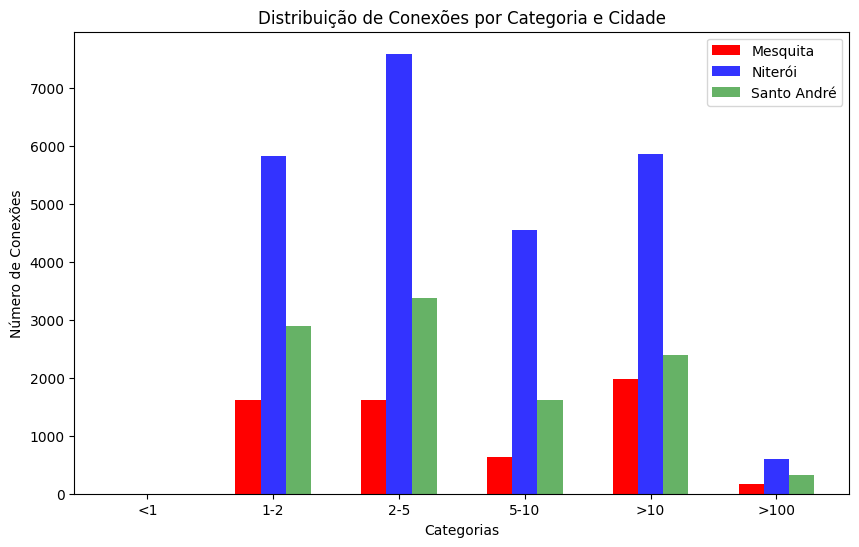

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que df_copy já tenha a coluna 'conexoes_categoria' com os novos limites

# Novos rótulos das categorias
labels = ['<1', '1-2', '2-5', '5-10', '>10', '>100']

# Filtrar o DataFrame para cada cidade, considerando tanto FROM quanto TO
mesquita_data = df_copy[(df_copy['type'] == 'Connection') & ((df_copy['Município_FROM'] == 'Mesquita') | (df_copy['Município_TO'] == 'Mesquita'))]['conexoes_categoria'].value_counts().reindex(labels, fill_value=0)
niteroi_data = df_copy[(df_copy['type'] == 'Connection') & ((df_copy['Município_FROM'] == 'Niterói') | (df_copy['Município_TO'] == 'Niterói'))]['conexoes_categoria'].value_counts().reindex(labels, fill_value=0)
santo_andre_data = df_copy[(df_copy['type'] == 'Connection') & ((df_copy['Município_FROM'] == 'Santo André') | (df_copy['Município_TO'] == 'Santo André'))]['conexoes_categoria'].value_counts().reindex(labels, fill_value=0)

# Categorias e dados de conexões para cada cidade
mesquita_values = mesquita_data.values.tolist()
niteroi_values = niteroi_data.values.tolist()
santo_andre_values = santo_andre_data.values.tolist()

# Definir a largura das barras e a posição das barras para cada categoria
bar_width = 0.2
bar_positions = np.arange(len(labels))

# Configurar as figuras e os eixos
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(bar_positions - bar_width, mesquita_values, width=bar_width, label='Mesquita', color='red')
ax.bar(bar_positions, niteroi_values, width=bar_width, label='Niterói', color='blue', alpha=0.8)
ax.bar(bar_positions + bar_width, santo_andre_values, width=bar_width, label='Santo André', color='green', alpha=0.6)

# Configurar os rótulos e títulos
ax.set_xlabel('Categorias')
ax.set_ylabel('Número de Conexões')
ax.set_title('Distribuição de Conexões por Categoria e Cidade')
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.legend()

# Exibir o gráfico
plt.show()


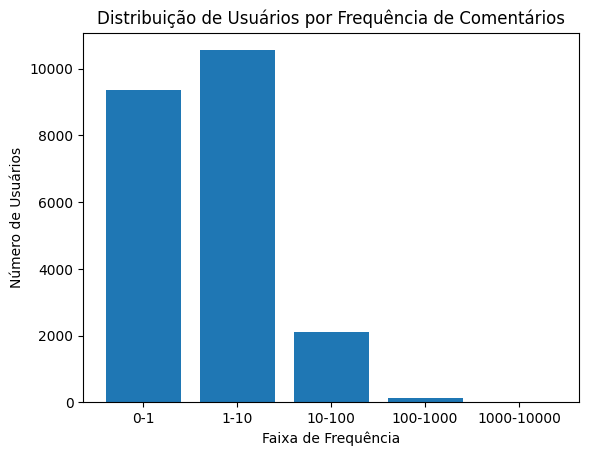

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar as interações do tipo "Comment"
comments = colab_interactions[colab_interactions['type'] == 'Comment']

# Calcular a contagem de comentários para cada usuário
comments_count = comments['colab_user_id_FROM'].value_counts()

# Definir as faixas de frequência
frequency_ranges = ['0-1', '1-10', '10-100', '100-1000', '1000-10000']

# Contar o número de usuários em cada faixa de frequência
users_count = []
for i in range(len(frequency_ranges)):
    if i == 0:
        count = sum(1 for c in comments_count if 0 <= c <= 1)
    else:
        low, high = map(int, frequency_ranges[i].split('-'))
        count = sum(1 for c in comments_count if low < c <= high)
    users_count.append(count)

# Criar o gráfico de barras
plt.bar(frequency_ranges, users_count)

# Configurar os rótulos e título
plt.xlabel('Faixa de Frequência')
plt.ylabel('Número de Usuários')
plt.title('Distribuição de Usuários por Frequência de Comentários')

# Exibir o gráfico
plt.show()


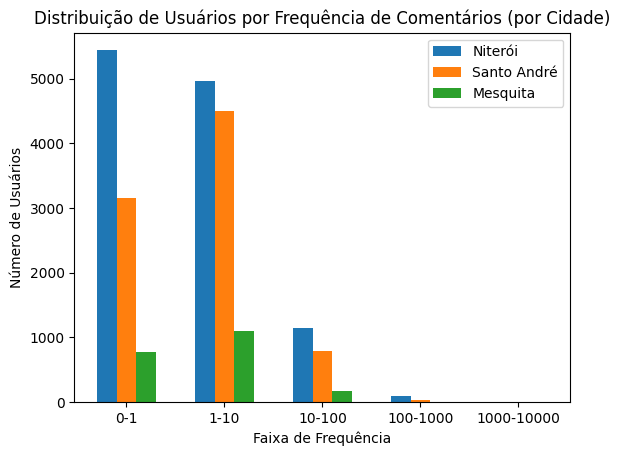

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar as interações do tipo "Comment" para cada cidade
comments_niteroi = colab_interactions[(colab_interactions['type'] == 'Comment') & (colab_interactions['Município_FROM'] == 'Niterói')]
comments_santo_andre = colab_interactions[(colab_interactions['type'] == 'Comment') & (colab_interactions['Município_FROM'] == 'Santo André')]
comments_mesquita = colab_interactions[(colab_interactions['type'] == 'Comment') & (colab_interactions['Município_FROM'] == 'Mesquita')]

# Calcular a contagem de comentários para cada usuário em cada cidade
comments_count_niteroi = comments_niteroi['colab_user_id_FROM'].value_counts()
comments_count_santo_andre = comments_santo_andre['colab_user_id_FROM'].value_counts()
comments_count_mesquita = comments_mesquita['colab_user_id_FROM'].value_counts()

# Definir as faixas de frequência
frequency_ranges = ['0-1', '1-10', '10-100', '100-1000', '1000-10000']

# Contar o número de usuários em cada faixa de frequência para cada cidade
users_count_niteroi = []
users_count_santo_andre = []
users_count_mesquita = []

for i in range(len(frequency_ranges)):
    if i == 0:
        count_niteroi = sum(1 for c in comments_count_niteroi if 0 <= c <= 1)
        count_santo_andre = sum(1 for c in comments_count_santo_andre if 0 <= c <= 1)
        count_mesquita = sum(1 for c in comments_count_mesquita if 0 <= c <= 1)
    else:
        low, high = map(int, frequency_ranges[i].split('-'))
        count_niteroi = sum(1 for c in comments_count_niteroi if low < c <= high)
        count_santo_andre = sum(1 for c in comments_count_santo_andre if low < c <= high)
        count_mesquita = sum(1 for c in comments_count_mesquita if low < c <= high)

    users_count_niteroi.append(count_niteroi)
    users_count_santo_andre.append(count_santo_andre)
    users_count_mesquita.append(count_mesquita)

# Criar o gráfico de barras
bar_width = 0.2
index = range(len(frequency_ranges))

plt.bar(index, users_count_niteroi, width=bar_width, label='Niterói')
plt.bar([i + bar_width for i in index], users_count_santo_andre, width=bar_width, label='Santo André')
plt.bar([i + 2 * bar_width for i in index], users_count_mesquita, width=bar_width, label='Mesquita')

# Configurar os rótulos e título
plt.xlabel('Faixa de Frequência')
plt.ylabel('Número de Usuários')
plt.title('Distribuição de Usuários por Frequência de Comentários (por Cidade)')

# Configurar as legendas
plt.legend()

# Configurar os rótulos do eixo x
plt.xticks([i + bar_width for i in index], frequency_ranges)

# Exibir o gráfico
plt.show()


In [ ]:
colab_interactions_comments = colab_interactions[(colab_interactions['type'] == 'Comment')]
print(colab_interactions_comments.columns)

Index(['type', 'colab_user_id_FROM', 'created_at_interaction',
       'colab_user_id_TO', 'birth_date_FROM', 'city_id_FROM', 'education_FROM',
       'gender_FROM', 'race_FROM', 'Município_FROM', 'idade_FROM',
       'birth_date_TO', 'city_id_TO', 'education_TO', 'gender_TO', 'race_TO',
       'Município_TO', 'idade_TO', 'year'],
      dtype='object')


<ipython-input-52-079de45a7623>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['idade_FROM'], shade=True)


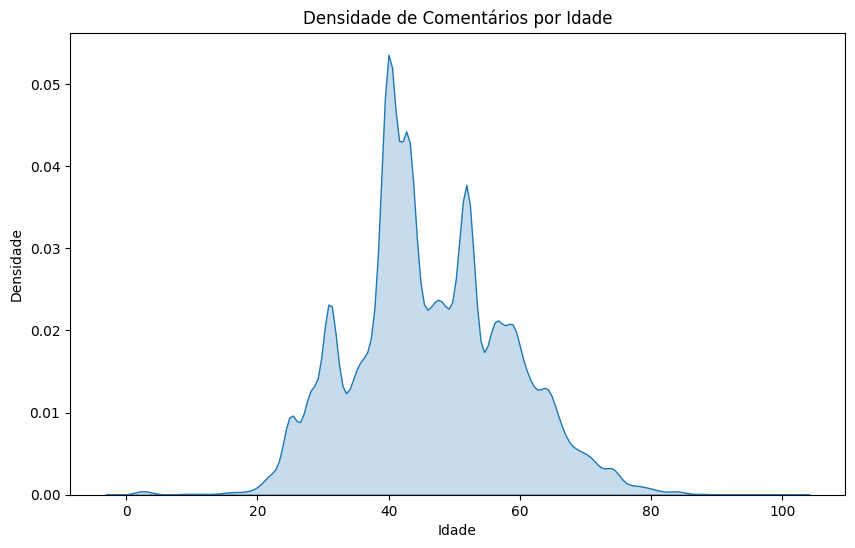

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você está utilizando colab_interactions_comments
df = colab_interactions_comments.copy()

# Certifique-se de que a coluna de idade está limpa
# Remova ou trate valores nulos ou inválidos, se houver
df = df.dropna(subset=['idade_FROM'])

# Se quiser criar faixas etárias
# limits = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]
# labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100+']
# df['faixa_etaria'] = pd.cut(df['idade_FROM'], bins=limits, labels=labels)

# Criar o gráfico de densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(df['idade_FROM'], shade=True)
plt.title('Densidade de Comentários por Idade')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()


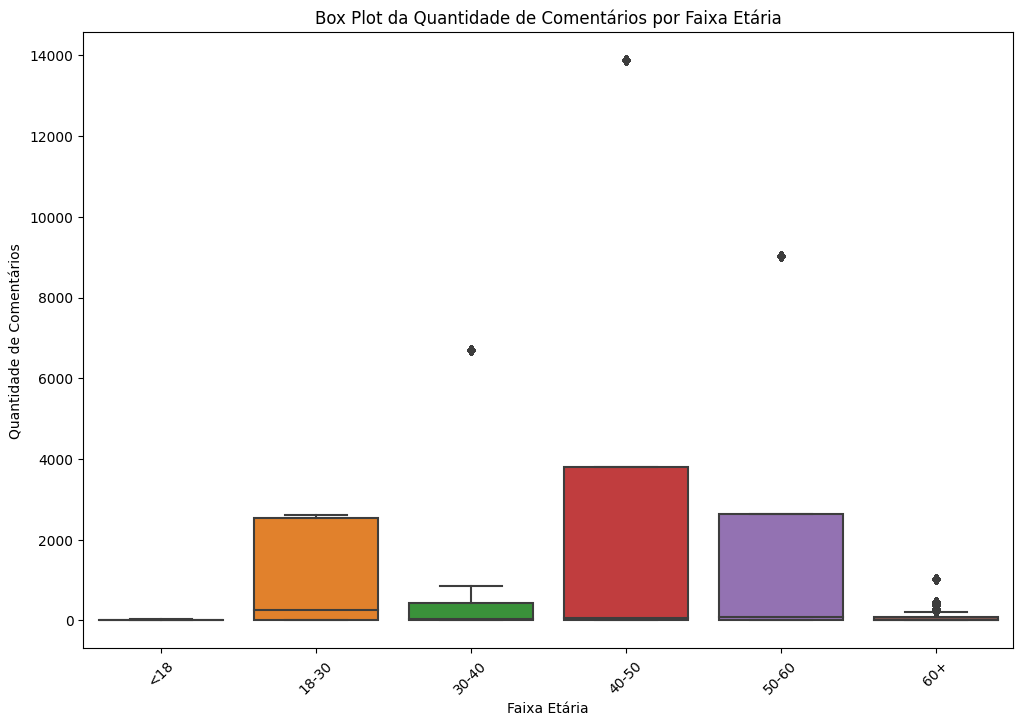

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que df seja seu DataFrame com os dados de comentários
df = colab_interactions_comments.copy()

# Definir as faixas etárias
bins = [0, 18, 30, 40, 50, 60, np.inf]
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']
df['faixa_etaria'] = pd.cut(df['idade_FROM'], bins=bins, labels=labels, right=False)

# Verificar e remover qualquer linha com NaN na faixa etária
df = df.dropna(subset=['faixa_etaria'])

# Contar comentários por usuário
comment_counts = df.groupby('colab_user_id_FROM').size()

# Juntar essa informação com o DataFrame original
df = df.merge(comment_counts.rename('comment_count'), left_on='colab_user_id_FROM', right_index=True)

# Plotar o Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='faixa_etaria', y='comment_count', data=df)
plt.title('Box Plot da Quantidade de Comentários por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Comentários')
plt.xticks(rotation=45)
plt.show()


# Correlation Matrix

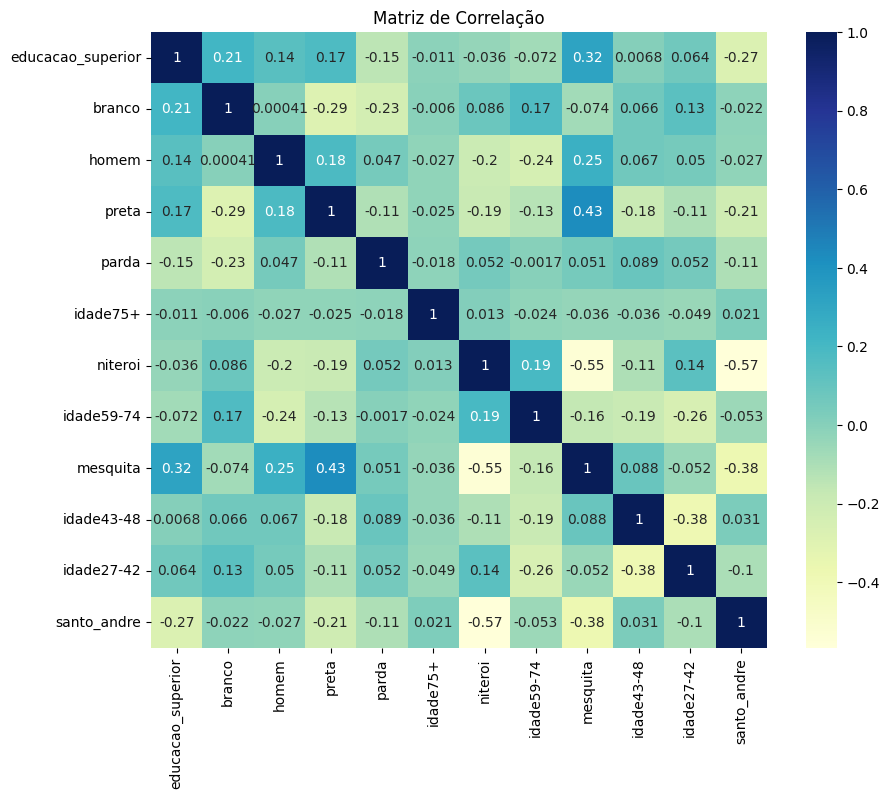

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma cópia do dataframe original
df_final = colab_interactions.copy()

# Criar as colunas booleanas com base nas características desejadas
df_final['educacao_superior'] = df_final['education_FROM'].isin(['bachelor', 'master', 'doctorate'])
df_final['branco'] = df_final['race_FROM'] == 'white'
df_final['homem'] = df_final['gender_FROM'] == 'male'
df_final['preta'] = df_final['race_FROM'] == 'black'
df_final['parda'] = df_final['race_FROM'] == 'brown'
df_final['idade75+'] = df_final['idade_FROM'] >= 75
df_final['niteroi'] = df_final['Município_FROM'] == 'Niterói'
df_final['idade59-74'] = df_final['idade_FROM'].between(59, 74)
df_final['mesquita'] = df_final['Município_FROM'] == 'Mesquita'
df_final['idade43-48'] = df_final['idade_FROM'].between(43, 48)
df_final['idade27-42'] = df_final['idade_FROM'].between(27, 42)
df_final['santo_andre'] = df_final['Município_FROM'] == 'Santo André'

# Selecionar as colunas relevantes para a análise
columns_for_correlation = ['educacao_superior', 'branco', 'homem', 'preta', 'parda',
                           'idade75+', 'niteroi', 'idade59-74', 'mesquita',
                           'idade43-48', 'idade27-42', 'santo_andre']

# Calcular a matriz de correlação
correlation_matrix = df_final[columns_for_correlation].corr()


# Plotar a matriz de correlação com tema verde e imagem mais larga
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', square=True)

# Configurar o título do gráfico
plt.title('Matriz de Correlação')

# Exibir o gráfico
plt.show()


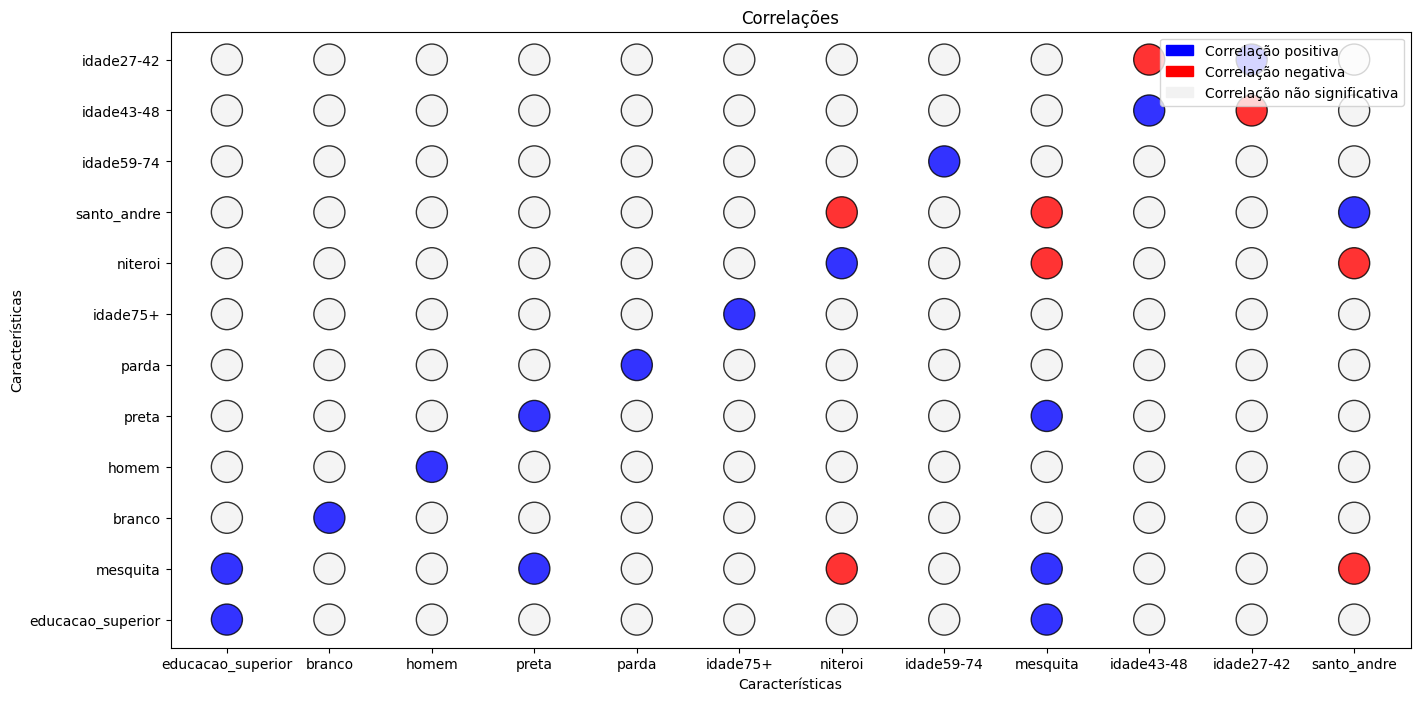

In [ ]:
# Filtrar apenas as correlações significativas
significant_correlations = correlation_matrix.copy()
significant_correlations[(significant_correlations <= 0.3) & (significant_correlations >= -0.3)] = 0

# Criar uma lista de coordenadas e cores com base nas correlações
coords = []
colors = []
gray_coords = []
gray_colors = []
for i, row in significant_correlations.iterrows():
    for j, val in row.items():
        if val != 0:
            coords.append((i, j))
            colors.append('blue' if val > 0 else 'red')
        else:
            gray_coords.append((i, j))
            gray_colors.append('#f2f2f2')

# Extrair os eixos 'x' e 'y' das coordenadas
x, y = zip(*coords)
gray_x, gray_y = zip(*gray_coords)

# Plotar as correlações em um scatter plot
plt.figure(figsize=(16, 8))
plt.scatter(x, y, c=colors, s=500, alpha=0.8, edgecolors='k')
plt.scatter(gray_x, gray_y, c=gray_colors, s=500, alpha=0.8, edgecolors='k')

# Adicionar a legenda
positive_patch = patches.Patch(color='blue', label='Correlação positiva')
negative_patch = patches.Patch(color='red', label='Correlação negativa')
gray_patch = patches.Patch(color='#f2f2f2', label='Correlação não significativa')
plt.legend(handles=[positive_patch, negative_patch, gray_patch], loc='upper right')

# Configurar o título e os rótulos dos eixos
plt.title('Correlações')
plt.xlabel('Características')
plt.ylabel('Características')

# Exibir o gráfico
plt.show()


# Logistic Regression

In [ ]:
# Agrupar as interações pelo user_id e contar o número de interações em cada grupo
interactions_map = colab_interactions.groupby('colab_user_id_FROM')['type'].count().reset_index()

# Renomear a coluna contendo o número de interações
interactions_map = interactions_map.rename(columns={'type': 'n_interactions'})

# Verificar o resultado
print(interactions_map)

       colab_user_id_FROM  n_interactions
0                       2            2507
1                      86            1774
2                    2654               6
3                    3514               3
4                    4251               3
...                   ...             ...
32206              977062               1
32207              977537               1
32208              978800               2
32209              978806               2
32210              982081               1

[32211 rows x 2 columns]


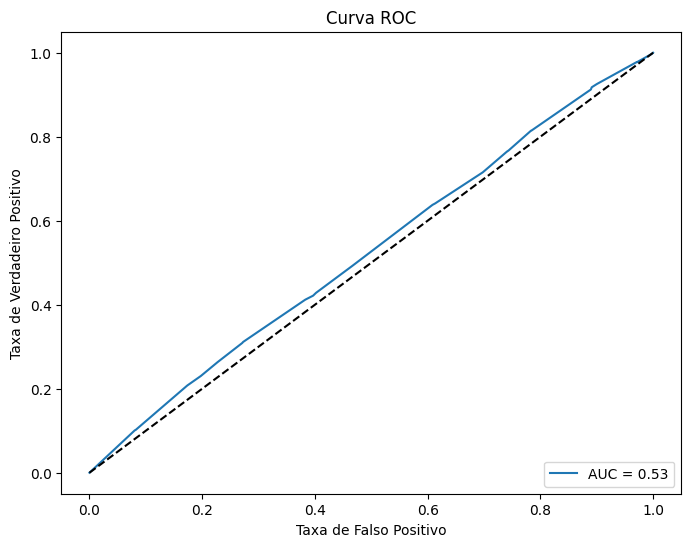

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Criar as features booleanas
boolean_features = pd.DataFrame()

# Cidade do usuário
boolean_features['niteroi'] = colab_interactions['Município_FROM'].str.lower().str.contains('niterói')
boolean_features['mesquita'] = colab_interactions['Município_FROM'].str.lower().str.contains('mesquita')
boolean_features['santo_andre'] = colab_interactions['Município_FROM'].str.lower().str.contains('santo andré')

# Escolaridade
education_mapping = {'ensino superior completo': True, 'mestrado': True, 'doutorado': True}
boolean_features['educacao_superior'] = colab_interactions['education_FROM'].map(education_mapping)

# Cor/raça
boolean_features['branco'] = colab_interactions['race_FROM'] == 'white'
boolean_features['preta'] = colab_interactions['race_FROM'] == 'black'
boolean_features['parda'] = colab_interactions['race_FROM'] == 'brown'

# Gênero
boolean_features['homem'] = colab_interactions['gender_FROM'] == 'male'

# Idade
boolean_features['idade75+'] = colab_interactions['idade_FROM'] >= 75

# Mesclar com o interaction map
merged_df = pd.merge(interactions_map, boolean_features, left_on='colab_user_id_FROM', right_index=True)

# Definir as variáveis independentes (features) e a variável dependente (target)
X = merged_df.drop(['colab_user_id_FROM', 'n_interactions'], axis=1)
y = merged_df['n_interactions'] > 3

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um pipeline com o imputer e o modelo de regressão logística
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('logreg', LogisticRegression())
])

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Prever as probabilidades das classes no conjunto de teste
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calcular a pontuação AUC-ROC usando y_test em vez de y
auc_score = roc_auc_score(y_test, y_pred_proba)

# Calcular a curva ROC usando y_test em vez de y
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


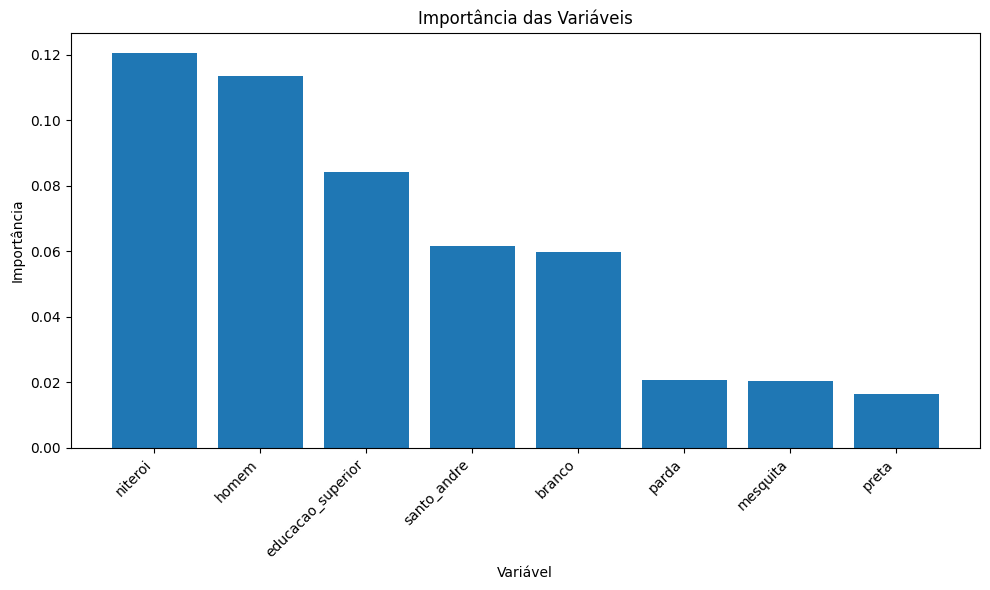

In [ ]:
# Obter as importâncias das variáveis
importances = pipeline.named_steps['logreg'].coef_[0]

# Verificar se o número de importâncias é menor que o número de colunas em X
if len(importances) < len(X.columns):
    # Remover a coluna correspondente do DataFrame X.columns
    X_columns = X.columns[:-1]  # Remove a última coluna (ou ajuste o índice conforme necessário)

    # Criar um DataFrame com as variáveis e suas importâncias
    importance_df = pd.DataFrame({'Variável': X_columns, 'Importância': np.abs(importances)})
    importance_df = importance_df.sort_values('Importância', ascending=False)
else:
    importance_df = pd.DataFrame({'Variável': X.columns, 'Importância': np.abs(importances)})
    importance_df = importance_df.sort_values('Importância', ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Variável'], importance_df['Importância'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Variável')
plt.ylabel('Importância')
plt.title('Importância das Variáveis')
plt.tight_layout()
plt.show()


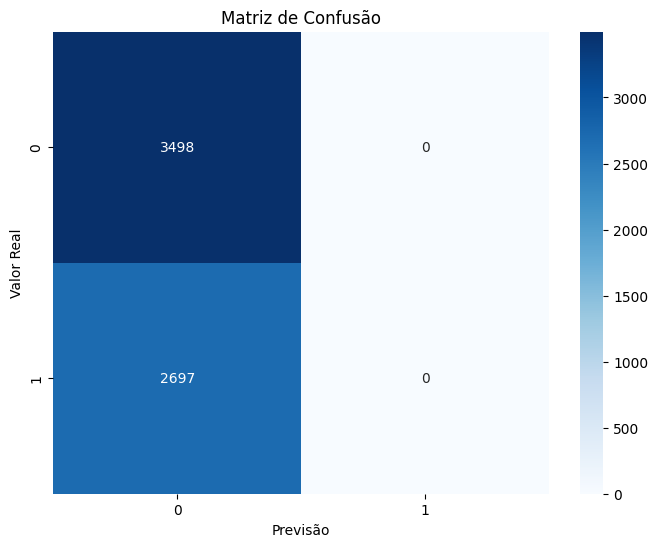

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcula as previsões do modelo
y_pred = pipeline.predict(X_test)

# Cria a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plota a matriz de confusão utilizando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão")
plt.show()

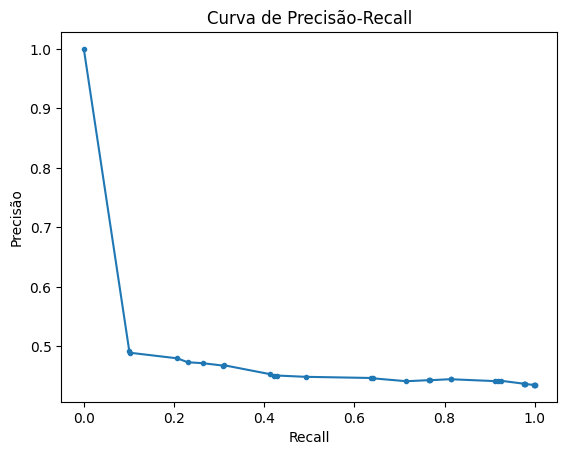

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calcula as probabilidades de previsão do modelo
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Calcula a precisão, o recall e os limiares
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plota a curva de precisão-recall
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva de Precisão-Recall')
plt.show()

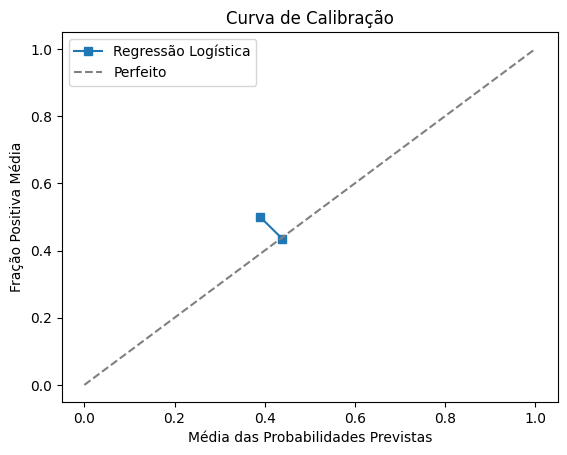

In [ ]:
from sklearn.calibration import calibration_curve

# Calcula as probabilidades de previsão do modelo
y_probs = pipeline.predict_proba(X_test)[:, 1]

# Calcula a fração positiva média e a média das probabilidades previstas
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_probs, n_bins=10)

# Plota a curva de calibração
plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Regressão Logística')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfeito')
plt.xlabel('Média das Probabilidades Previstas')
plt.ylabel('Fração Positiva Média')
plt.title('Curva de Calibração')
plt.legend()
plt.show()